In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist, fashion_mnist, cifar10

In [2]:
def pooling_layer(input_map, pool=2, stride=2, layer='max'):
    
    pool_size = (pool, pool)
    stride_size = (stride, stride)

    output_height = int((input_map.shape[0] - pool_size[0]) / stride_size[0]) + 1
    output_width = int((input_map.shape[1] - pool_size[1]) / stride_size[1]) + 1

    feature_map = np.zeros((output_height, output_width), dtype=np.int32)
    
    for i in range(output_height):
        for j in range(output_width):
            pool = input_map[i*stride_size[0]:i*stride_size[0]+pool_size[0], j*stride_size[1]:j*stride_size[1]+pool_size[1]]

            if 'max' in layer:
                val = np.max(pool)
            else:
                val = np.average(pool)
        
            feature_map[i, j] = val

    return feature_map

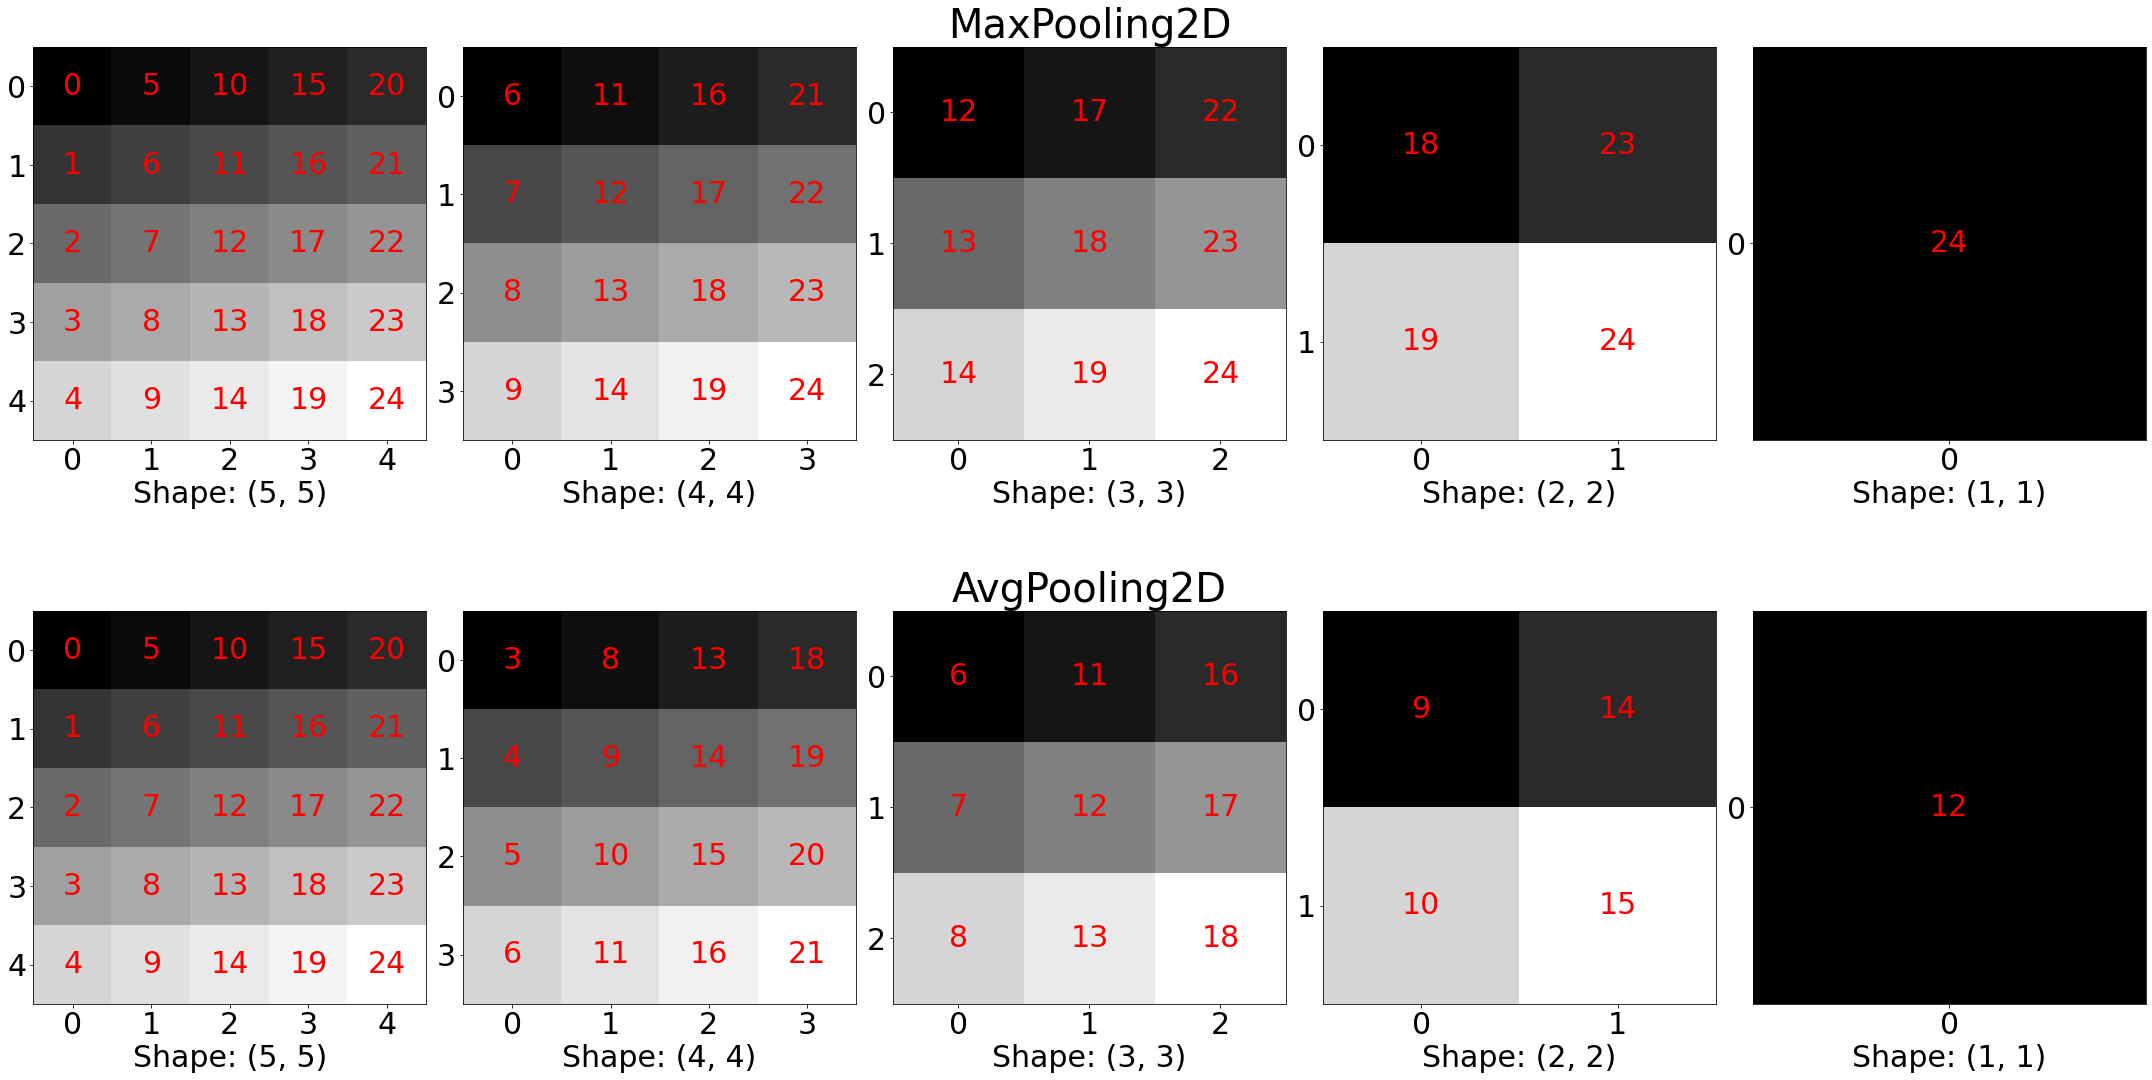

In [110]:
fig, ax = plt.subplots(2, 5, figsize=(30, 16))

FONTSIZE = 30

n = 5
arr = np.arange(n**2).reshape(n, n)

for idx in range(5):
    ax[0, idx].imshow(arr, cmap='gray')
    ax[0, idx].set_xticks(np.arange(arr.shape[0]))
    ax[0, idx].xaxis.set_tick_params(labelsize=FONTSIZE)
    ax[0, idx].yaxis.set_tick_params(labelsize=FONTSIZE)
    
    ax[0, idx].set_yticks(np.arange(arr.shape[1]))
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            ax[0, idx].text(i, j, arr[i][j], color='red', ha='center', va='center', fontsize=FONTSIZE) 
    ax[0, idx].set_xlabel(f'Shape: {arr.shape}', fontsize=FONTSIZE)
    arr = pooling_layer(arr, stride=1)
ax[0, 2].set_title('MaxPooling2D', fontsize=FONTSIZE+10)

n = 5
arr = np.arange(n**2).reshape(n, n)

for idx in range(5):
    ax[1, idx].imshow(arr, cmap='gray')
    ax[1, idx].set_xticks(np.arange(arr.shape[0]))
    ax[1, idx].set_yticks(np.arange(arr.shape[1]))
    ax[1, idx].xaxis.set_tick_params(labelsize=FONTSIZE)
    ax[1, idx].yaxis.set_tick_params(labelsize=FONTSIZE)
    
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            ax[1, idx].text(i, j, arr[i][j], color='red', ha='center', va='center', fontsize=FONTSIZE) 
    ax[1, idx].set_xlabel(f'Shape: {arr.shape}', fontsize=FONTSIZE)
    arr = pooling_layer(arr, stride=1, layer='avg')
ax[1, 2].set_title('AvgPooling2D', fontsize=FONTSIZE+10)


plt.tight_layout()
plt.savefig('Pooling2D.png', bbox_inches='tight')
plt.show();

In [4]:
def dense_layer(input_map):
    return input_map.flatten().reshape(1, -1)

In [5]:
def relu(x):
    return np.where(x < 0, 0, x)

In [6]:
def lrelu(x):
    return np.where(x < 0, 0.01 * x, x)

In [7]:
def covolutional_layer(input_map, kernel=3):
    # kernel_size = (kernel, kernel)
    # conv_kernel = np.random.randn(kernel_size[0], kernel_size[1])
    # conv_kernel = np.array([[1, 0, -1],
    #                [2, 0, -2],
    #                [1, 0, -1]])

    conv_kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

    # conv_kernel = np.array([[0, -1, 0],
    #                [-1, 5, -1],
    #                [0, -1, 0]])

    # Perform the convolution operation
    convolution_result = np.zeros((input_map.shape[0]-kernel+1, input_map.shape[1]-kernel+1))
    
    for i in range(convolution_result.shape[0]):
        for j in range(convolution_result.shape[1]):
            convolution_result[i, j] = np.sum(input_map[i:i+kernel, j:j+kernel] * conv_kernel)

    return lrelu(convolution_result)

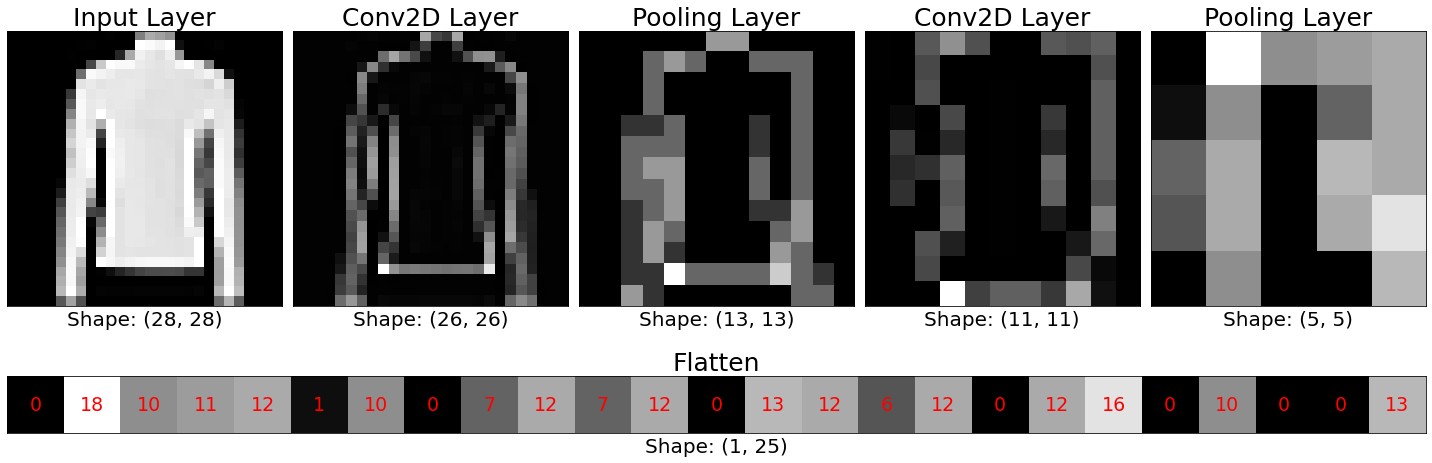

In [44]:
(X, y), (_, _) = fashion_mnist.load_data()
idx = np.random.randint(0, X.shape[0])
input_map = X[idx]
input_map = input_map.astype('float32') / 255.0

FONT_SIZE = 20
cmap = 'gray'


fig, axs = plt.subplot_mosaic([['1', '2', '3', '4', '5'],
                              ['6','6','6','6','6']],
                              figsize=(20, 8),
                              constrained_layout=True)

axs['1'].imshow(input_map, cmap=cmap)
axs['1'].set_xlabel(f'Shape: {input_map.shape}', fontsize=FONT_SIZE)
axs['1'].set_title('Input Layer', fontsize=FONT_SIZE+5)

input_map = covolutional_layer(input_map, kernel=3)
axs['2'].imshow(input_map, cmap=cmap)
axs['2'].set_xlabel(f'Shape: {input_map.shape}', fontsize=FONT_SIZE)
axs['2'].set_title('Conv2D Layer', fontsize=FONT_SIZE+5)

input_map = pooling_layer(input_map, pool=2, stride=2)
axs['3'].imshow(input_map, cmap=cmap)
axs['3'].set_xlabel(f'Shape: {input_map.shape}', fontsize=FONT_SIZE)
axs['3'].set_title('Pooling Layer', fontsize=FONT_SIZE+5)

input_map = covolutional_layer(input_map, kernel=3)
axs['4'].imshow(input_map, cmap=cmap)
axs['4'].set_xlabel(f'Shape: {input_map.shape}', fontsize=FONT_SIZE)
axs['4'].set_title('Conv2D Layer', fontsize=FONT_SIZE+5)

input_map = pooling_layer(input_map, pool=2, stride=2)
axs['5'].imshow(input_map, cmap=cmap)
axs['5'].set_xlabel(f'Shape: {input_map.shape}', fontsize=FONT_SIZE)
axs['5'].set_title('Pooling Layer', fontsize=FONT_SIZE+5)

input_map = dense_layer(input_map)
axs['6'].imshow(input_map, cmap=cmap)
axs['6'].set_xlabel(f'Shape: {input_map.shape}', fontsize=FONT_SIZE)
axs['6'].set_title('Flatten', fontsize=FONT_SIZE+5)
for i in range(input_map.shape[1]):
    axs['6'].text(i, 0, input_map[0][i], color='red', ha='center', 
                       va='center', fontsize=FONT_SIZE-1)

for i in range(1, 7):
    axs[str(i)].set_xticks([])
    axs[str(i)].set_yticks([])

fig.set_tight_layout(True)
plt.savefig('conv.png')
plt.show()

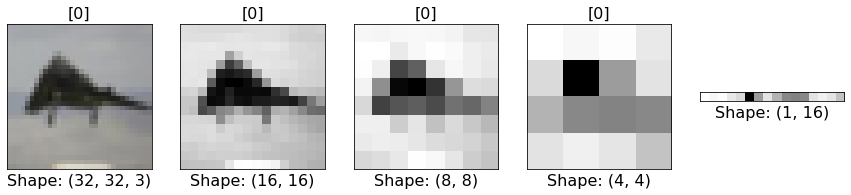

In [155]:
(X_train, y_train), (_, _) = cifar10.load_data()

idx = np.random.randint(0, X_train.shape[0])
input_map = X_train[idx]

FONT_SIZE = 16

nrows, ncols = 1, 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 25))

for i in range(ncols-1):
    axs[i].imshow(input_map, cmap='gray')
    axs[i].set_title(y_train[idx], fontsize=FONT_SIZE)
    axs[i].set_xlabel(f'Shape: {input_map.shape}', fontsize=FONT_SIZE)
    axs[i].set_xticks([])
    axs[i].set_yticks([])

    if i == ncols-2:
        break
    input_map = pooling_layer(input_map, layer='avg')

input_map = dense_layer(input_map)
axs[i+1].imshow(input_map, cmap='gray')
axs[i+1].set_xlabel(f'Shape: {input_map.shape}', fontsize=FONT_SIZE)
axs[i+1].set_xticks([])
axs[i+1].set_yticks([])
    

plt.show();

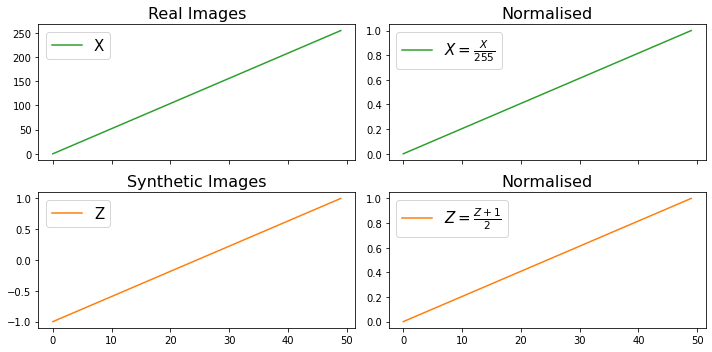

In [85]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5), sharex=True)
ax = ax.flatten()

fontsize=20

X = np.linspace(0, 255)
ax[0].plot(X, color='C2', label='X')
ax[0].set_title('Real Images', fontsize=fontsize-4)
ax[0].legend(fontsize=fontsize-5)

X = (X) / 255
ax[1].plot(X, color='C2', label=r'$X=\frac{X}{255}$')
ax[1].set_title('Normalised', fontsize=fontsize-4)
ax[1].legend(fontsize=fontsize-5)

X = np.linspace(-1, 1)
ax[2].plot(X, color='C1', label='Z')
ax[2].set_title('Synthetic Images', fontsize=fontsize-4)
ax[2].legend(fontsize=fontsize-5)

X = np.linspace(-1, 1)
X = (X + 1) / 2
ax[3].plot(X, color='C1', label=r'$Z=\frac{Z+1}{2}$')
ax[3].set_title('Normalised', fontsize=fontsize-4)
ax[3].legend(fontsize=fontsize-5)

plt.tight_layout()
plt.savefig('normalised-images.png', bbox_inches='tight')
plt.show();